# Git Tutorial
Author Joel Ridden (20221104)

# Why use Git?

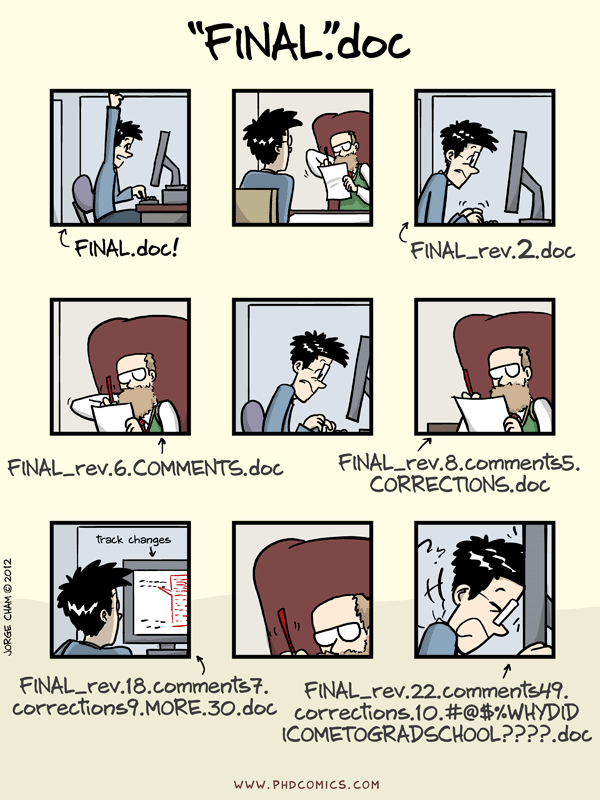

Version control systems start with a base version of the document and then record changes you make each step of the way. You can think of it as a recording of your progress, you can rewind to start at the base document and play back each change you made, eventually arriving at your more recent version.

Once you think of changes as separate from the document itself, you can then think about “playing back” different sets of changes on the base document, ultimately resulting in different versions of that document. For example, two users can make independent sets of changes on the same document.

# Git Basics 

Ensure you have your global username and email set.
This can be check by the following git command.
This is your identity for Git which is very important when collaborating.

In [ ]:
!git config --list

In [ ]:
!git config --global user.name "joelridden"
!git config --global user.email "jriddenw@gmail.com"

In [ ]:
!git help

# Tracking Changes

Create a new file called faults.txt and add a fault [Hossack]

Status shows that a file has been made.

In [ ]:
!git status

Untracked means that there’s a file in the directory that Git isn’t keeping track of. We can tell Git to track a file using git add.

In [ ]:
!git add faults.txt

Now the status will show us that it is meant to keep track of faults.txt

In [ ]:
!git status

Now we can commit these changes to our local Git repository. Using the following command and -m to add a message explaining breifly what has been changed / added.

In [ ]:
!git commit -m "Adding faults file"

Add a new fault to faults.txt [AlpineF2K]

When we run git status now, it tells us that a file it already knows about has been modified.

In [ ]:
!git status

We can check the difference between our current version and what we have commited to Git by using git diff.

In [ ]:
!git diff

Now we can add and commit the new fault with another git add and commit command.

In [ ]:
!git add faults.txt

In [ ]:
!git commit -m "Adding another fault"

Below shows how git add and git commit works together. By using git add we can add files to the staging area and then with git commit we take those staged changes and commit them to the repository.

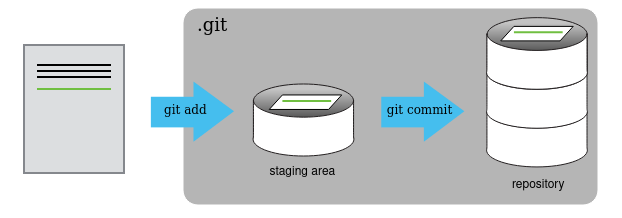

You can also add entire folders with git add.

Say we add a Data folder and then place 2 files a.txt and b.txt.
The folder and everything inside can be added using the following git command.

In [ ]:
!git add Data
!git commit -m "Add Data folder"

# Managing History

Add another fault to faults.txt [Moonshine]

We can look at the difference between our current version and past versions by using git diff but with specifying a version of our git repository. This can be done by comparing with the HEAD of the repository. This is the most recent commit to our current branch.

In [ ]:
!git diff HEAD faults.txt

In [ ]:
!git diff HEAD~1 faults.txt

We can also use a specific commit ID tag to compare. To find this we can use the git show command to extract the ID.

In [ ]:
!git show HEAD~2 faults.txt

Once we have the commit ID we can insert this into the git diff to compare.

In [ ]:
!git diff [commit ID]

We can use this feature also to revert back to a previous commit for faults.txt

In [ ]:
!git checkout HEAD faults.txt

In [ ]:
!git checkout [commit ID] faults.txt

Care about missing the faults.txt

In [ ]:
git checkout [commit ID]
You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

git checkout -b <new-branch-name>
git checkout master

# Git Ignore

Not all files need to be added to git. For example Data files can be quite large, csvs and srfs can take up alot of space and are not always needed in the repository. We can create a file that lists the files for git to ignore.

Create a file called .gitignore and place inside:
*.csv
*.srf
/results
This will ignore all csv and srf files and any files within the results folder.

We need to add the .gitignore file to git with the git add and git commit commands again.

In [ ]:
!git add .gitignore
!git commit -m "Ignore csv/srf files and results folder"

If we try to git add a csv file we will get an error.

In [ ]:
!git add a.csv

However we can force this with using the -f parameter.

In [ ]:
!git add -f a.csv

# Git Remote Repositories

Create a new repo online at github.com 

In [ ]:
!git remote add origin [git url]

Check it worked

In [ ]:
!git remote -v

SSH is useful for most of our other git repositories for commiting and pulling private repositories data which some of our repositories are.

Check if there is any current ssh keys you have

In [ ]:
!ls -al ~/.ssh

Create a new ssh key

In [ ]:
!ssh-keygen -t ed25519
# Set no passphrase unless you want to enter this password each time you want to pull from Github

Now you can check and shoudl see soem keys available to use.

In [ ]:
!ls -al ~/.ssh

Now we can add the SSH key to the ssh-agent usign the following commands.

In [ ]:
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

We now need to add our public key to the git repository we made.

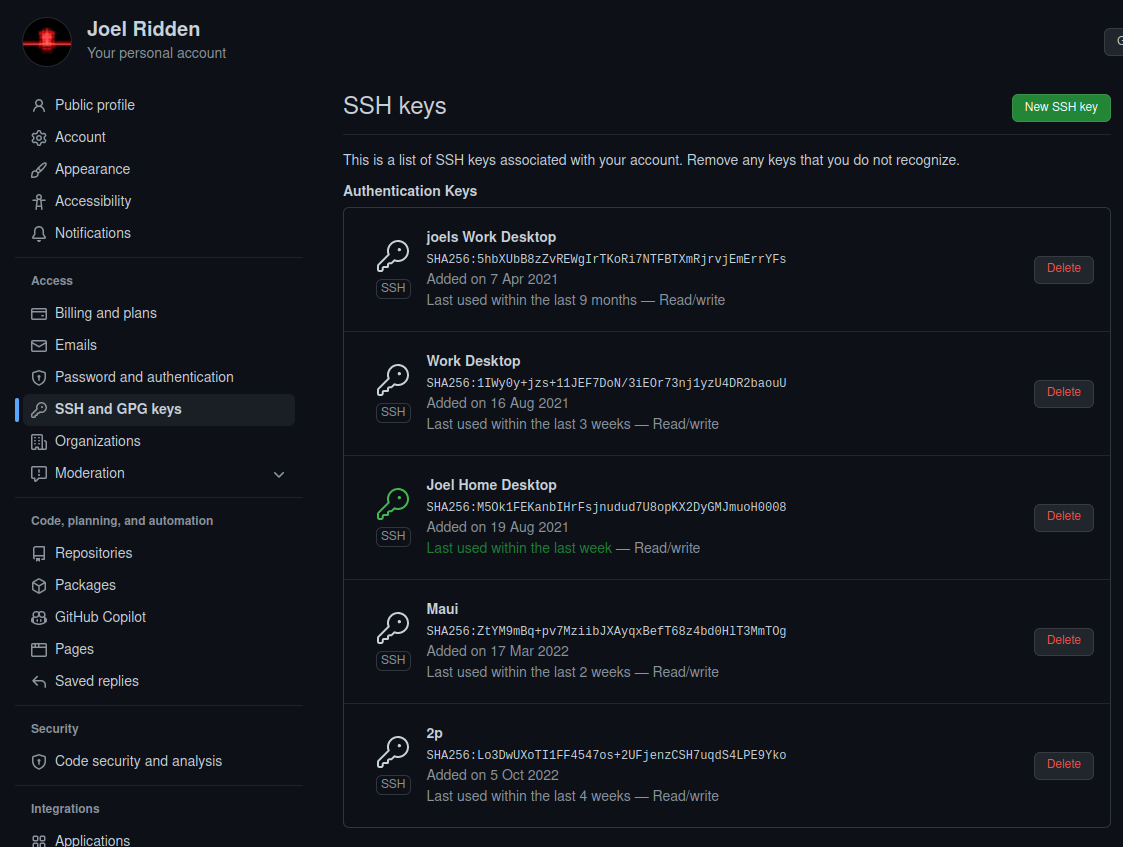

We can get the information from the public key by using the following command.

In [ ]:
!cat ~/.ssh/id_ed25519.pub

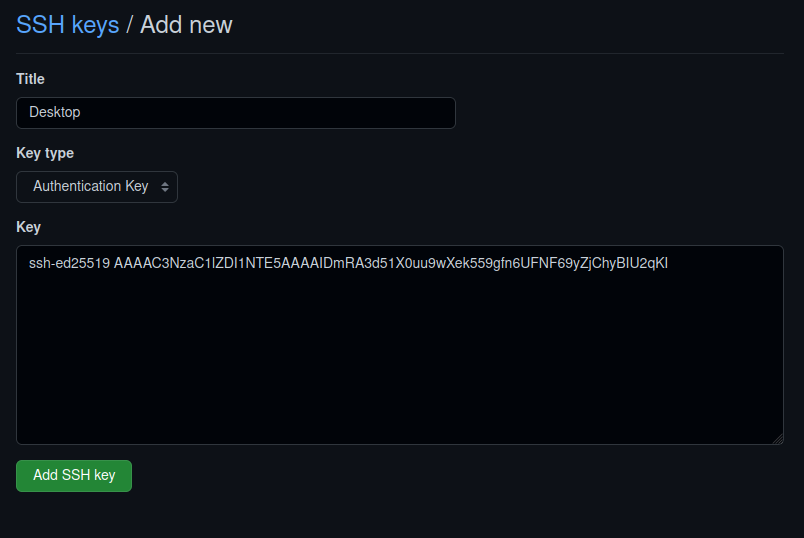

Now we should be able to push our changes to our remote repository.

In [ ]:
!git push origin master

# Git Collaboration

Sometimes we will need to work together on a repository as we may have code we share and develop together. Below shows how to add a collaborator to your git repository.

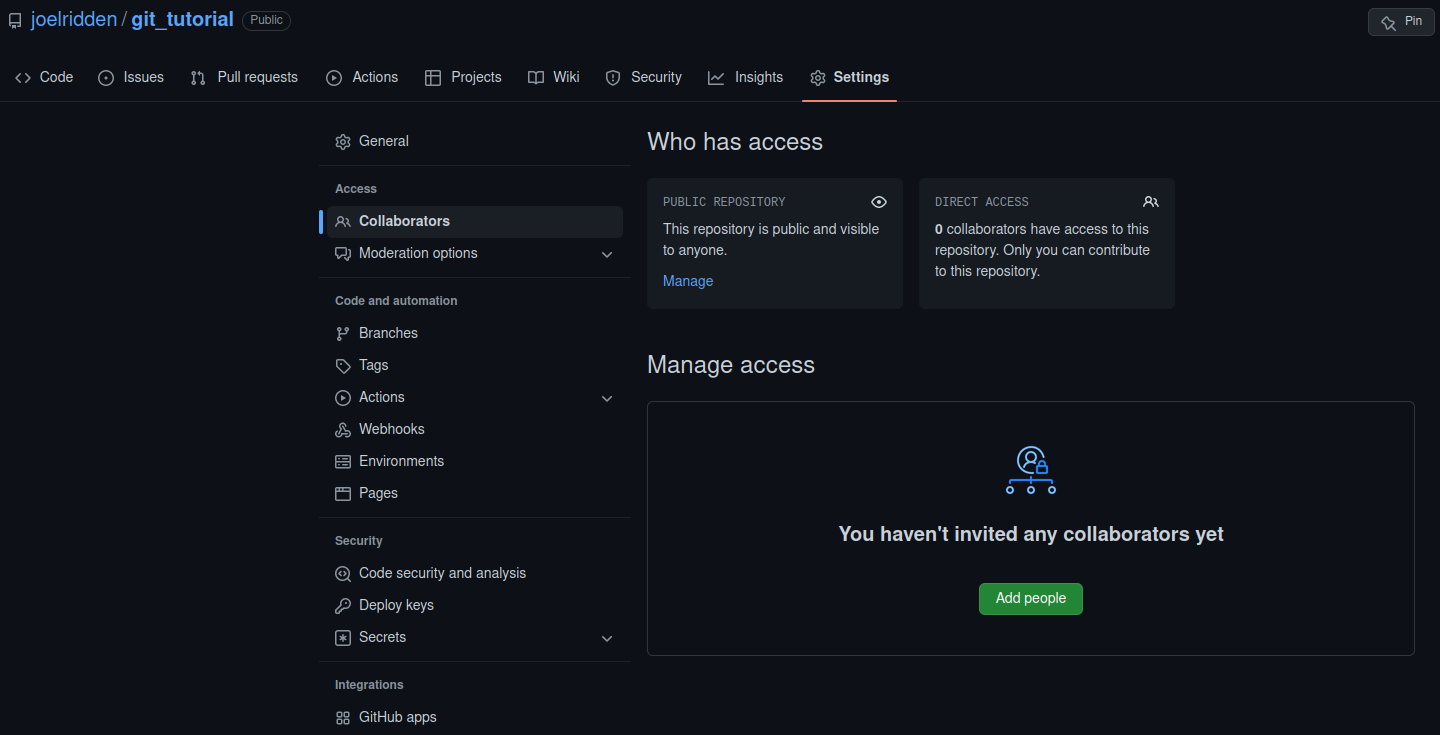

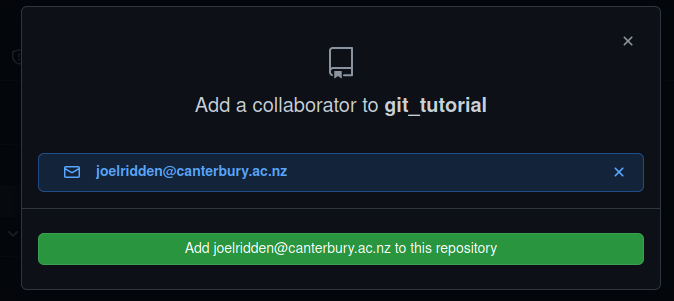

As a collabortator who can now make changes to your repository add a new file stations.txt
CCCC # Christchurch

In [ ]:
!git add stations.txt
!git commit -m "Adding stations"
!git push origin master

Owner can now pull these changes and get the CCCC stations file.

In [ ]:
!git pull origin master

# Git Conflicts

As soon as people can work in parallel, they’ll likely step on each other’s toes. This will even happen with a single person: if we are working on a piece of software on both our laptop and a server in the lab, we could make different changes to each copy. Version control helps us manage these conflicts by giving us tools to resolve overlapping changes.

To see how we can resolve conflicts, we must first create one.
If the collaborator now adds another station to this file. WTES # Wellington
and commits those changes and pushes to the repository.

In [ ]:
!git add stations.txt
!git commit -m "Adding Wellington"
!git push origin master

Now the owner make a different change to their copy without updating from GitHub. By adding another station that isn't wellington. Say ROTS.

You can add and commit this change.

In [1]:
!git add stations.txt
!git commit -m "Adding new station"

fatal: pathspec 'stations.txt' did not match any files
On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   QuakeCoRE Git Workshop.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	QuakeCoRE Python Workshop.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


However you will not be able to push due to conflicting changes.

In [ ]:
!git push origin master

Username for 'https://github.com': 

Git rejects the push because it detects that the remote repository has new updates that have not been incorporated into the local branch. What we have to do is pull the changes from GitHub, merge them into the copy we’re currently working in, and then push that.

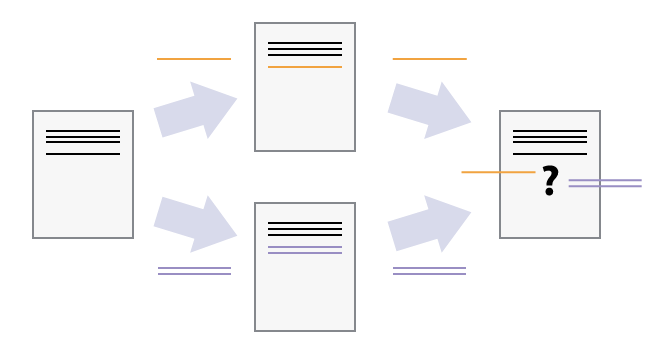

To do this first we need to pull the changes from the remote repository.

In [ ]:
!git pull origin master

After the changes from remote branch have been fetched, Git detects that changes made to the local copy overlap with those made to the remote repository, and therefore refuses to merge the two versions to stop us from trampling on our previous work. The conflict is marked in in the affected file.

If we look at our file we shall see the following:

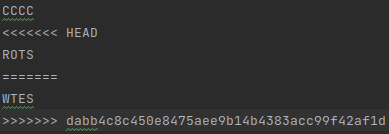

Our change is preceded by <<<<<<< HEAD. Git has then inserted ======= as a separator between the conflicting changes and marked the end of the content downloaded from GitHub with >>>>>>>. (The string of letters and digits after that marker identifies the commit we’ve just downloaded and will be different to above)

It is now up to us to edit this file to remove these markers and reconcile the changes. We can do anything we want, keep the change made in the local repository, keep the change made in the remote repository, write something new to replace both, or get rid of the change entirely. Lets say we realize that we just want CCCC and ROTS in the file and not WTES so we edit the file by removing the HEAD ==== and >>> and just leave the file how we want it to be.

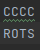

In [ ]:
!git add stations.txt
!git status

In [ ]:
!git commit -m "Merge changes from GitHub"
!git push origin master

The collaborator does not need to deal with this conflict as it is now dealt with on the remote repository. Now they just need to do a pull and they will get the merged changes.

# PyCharm Git

Thankfully we don't always need to use the console to manage our git control. PyCharm has a built in Git GUI which can help us manage git easier. Their documentation on this can be found here: https://www.jetbrains.com/help/pycharm/set-up-a-git-repository.html

They provide many options:
- Add remotes to existing code
- Share current exsiting code to GitHub (without needed to leave PyCharm)
- When git cloned a repository you can just open the directory and PyCharm with autodetect the repository and add it to the project
- For new files users are asked if they want to git add to be tracked (This only needs to happen once)
- The commit tab on the left shows tracked changes and you can select / tick files to add to a commit (You can also commit and push with one button)
- Bottom right you can manage the remote changes by pushing / pulling and fetching (Updating) changes from the remote repository to your local git repository

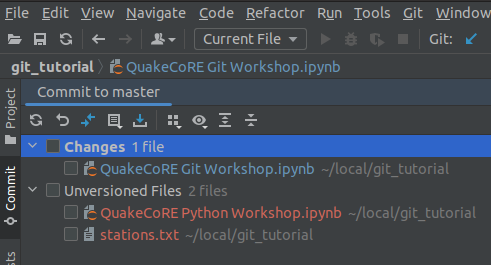

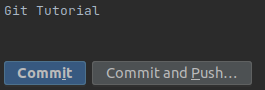

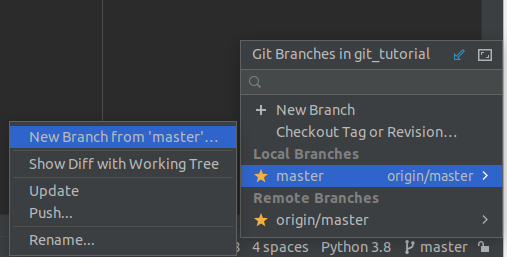

# Branches

Git branches are effectively a pointer to a snapshot of your changes. When you want to add a new feature or fix a bug no matter how big or how small, you create a new branch to hold your changes. This makes it harder for unstable code to get merged into the main code base, and it gives you the chance to clean up your changes before merging it into the main branch.

Create a new branch in PyCharm from master (or main) call it example.

Add a new fault to fault.txt [AlpineK2T]

Now you can commit and push this change to your new branch in PyCharm.

# Pull Requests and Merging

Pull Requests is a good practice for merging branches back into the master (or main) branch when working in collaboration with others

# QuakeCoRESoft Git Repositories